<a href="https://colab.research.google.com/github/Ceachi/Liniar-Regression-Learned-Index./blob/master/Liniar_Regression_Learned_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import section
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
rng = np.random
np.random.seed(0)

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 100

In [3]:
# Here we generate 2 arrays
# train_X = is the sorted array (reprezentation of the records)
# train_Y = for each element in vector XX, 
            #in this vector we will determine the page number
            # we assume that a page_size have 4 elements
train_X = np.array([])
train_Y = np.array([])
j=0
label=1
# Generate the data and labels
for i in range(6, 106):
  train_X = np.append(train_X, i)
  train_Y = np.append(train_Y, label)
  page_size = 4
  j+=1
  if(j%page_size==0):
    label+=1
    j=0
n_samples = train_X.shape[0]
# Print the data and labels
print(train_X)  
print(train_Y)

[  6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105.]
[ 1.  1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.
  5.  5.  6.  6.  6.  6.  7.  7.  7.  7.  8.  8.  8.  8.  9.  9.  9.  9.
 10. 10. 10. 10. 11. 11. 11. 11. 12. 12. 12. 12. 13. 13. 13. 13. 14. 14.
 14. 14. 15. 15. 15. 15. 16. 16. 16. 16. 17. 17. 17. 17. 18. 18. 18. 18.
 19. 19. 19. 19. 20. 20. 20. 20. 21. 21. 21. 21. 22. 22. 22. 22. 23. 23.
 23. 23. 24. 24. 24. 24. 25. 25. 25. 25.]


In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Construct a linear model pred = w * x + b
pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Mean squared error, mean square error, Cx = (model(key) - pos)**2
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.167564258 W= 0.23571372 b= 0.22751395


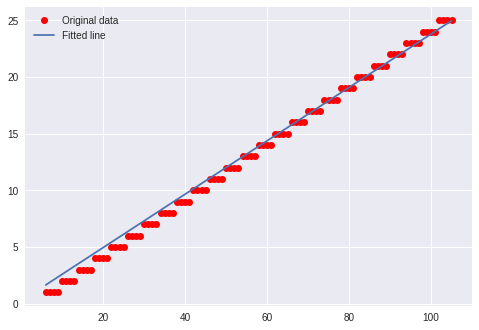

Epoch: 0200 cost= 0.144172519 W= 0.23663343 b= 0.13085504


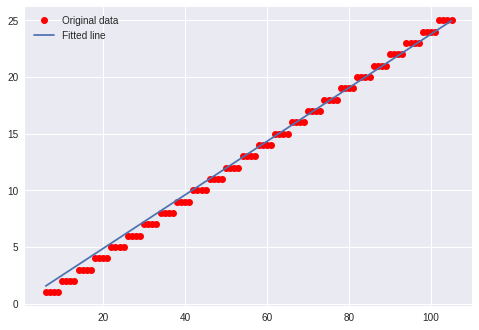

Epoch: 0300 cost= 0.125512108 W= 0.23746069 b= 0.043913323


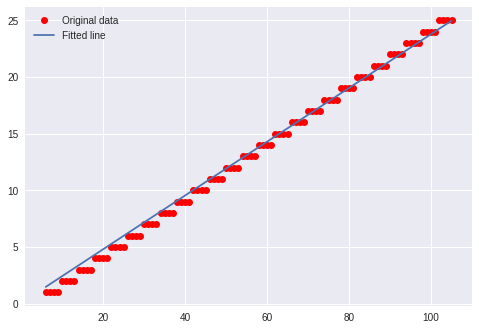

Epoch: 0400 cost= 0.110652760 W= 0.23820479 b= -0.034288008


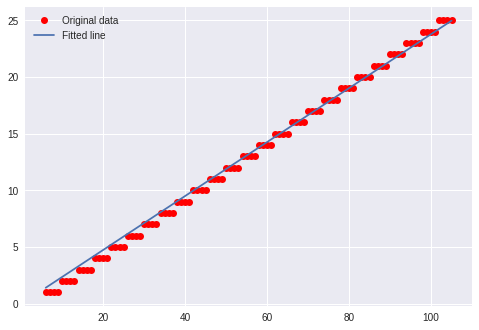

Epoch: 0500 cost= 0.098844774 W= 0.2388741 b= -0.10462765


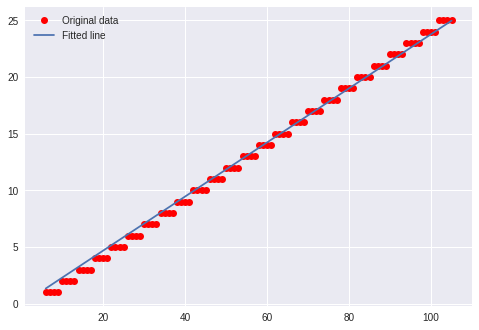

Epoch: 0600 cost= 0.089483947 W= 0.2394761 b= -0.16789582


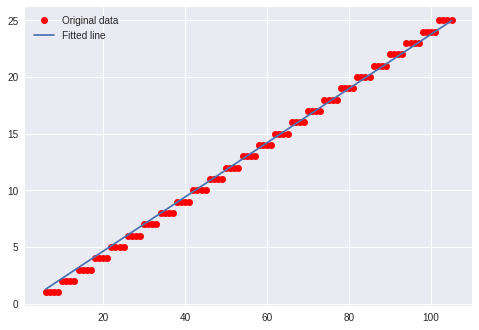

Epoch: 0700 cost= 0.082083687 W= 0.24001758 b= -0.22480355


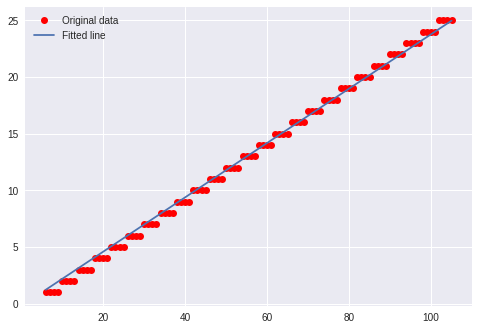

Epoch: 0800 cost= 0.076252237 W= 0.24050461 b= -0.27598998


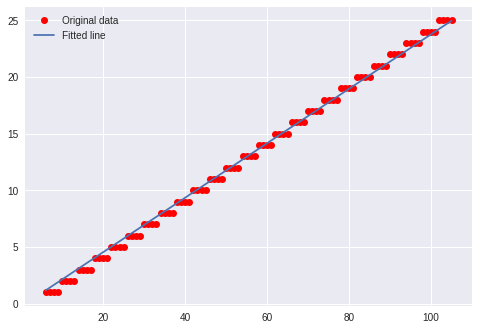

Epoch: 0900 cost= 0.071674161 W= 0.24094272 b= -0.3220325


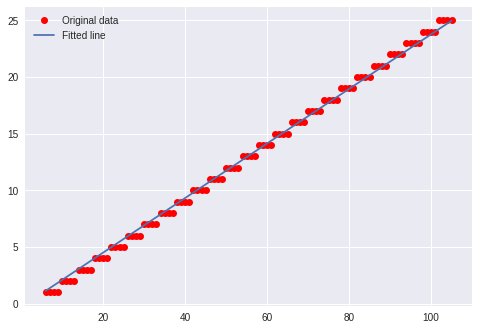

Epoch: 1000 cost= 0.068096451 W= 0.24133675 b= -0.36344308


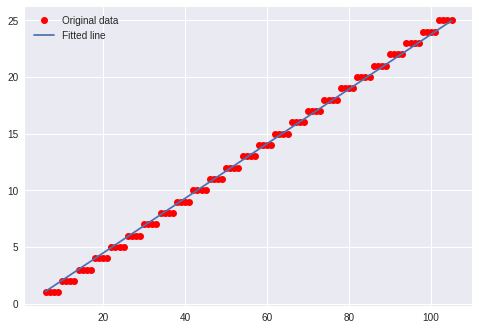

Epoch: 1100 cost= 0.065314986 W= 0.24169119 b= -0.40069216


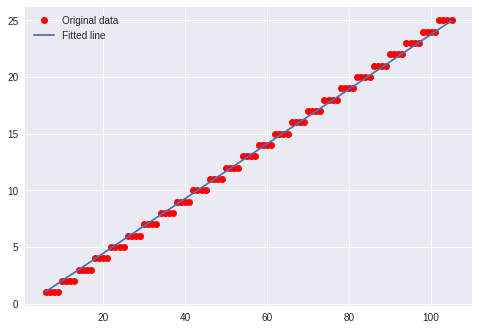

Epoch: 1200 cost= 0.063166574 W= 0.24200998 b= -0.43419674


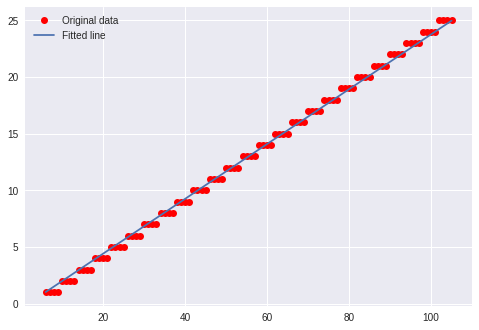

Epoch: 1300 cost= 0.061520092 W= 0.24229673 b= -0.4643331


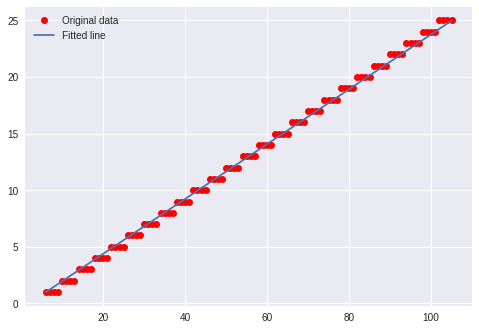

Epoch: 1400 cost= 0.060270485 W= 0.24255465 b= -0.49143985


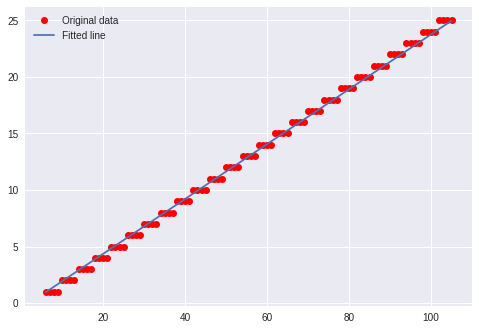

Epoch: 1500 cost= 0.059333429 W= 0.24278665 b= -0.51582015


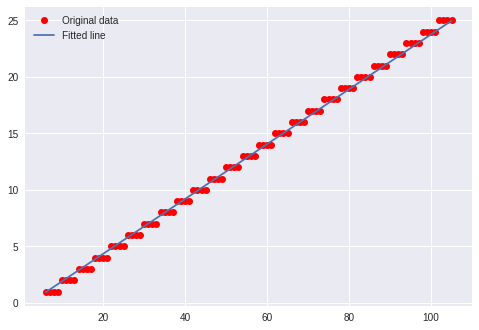

Epoch: 1600 cost= 0.058642261 W= 0.2429953 b= -0.53774935


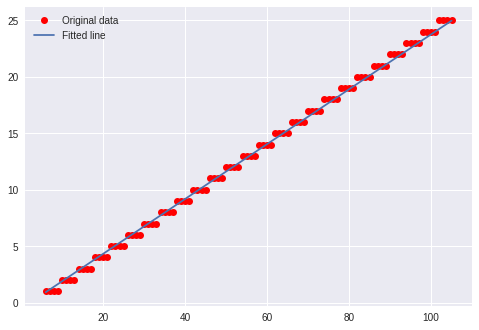

Epoch: 1700 cost= 0.058142945 W= 0.24318299 b= -0.5574751


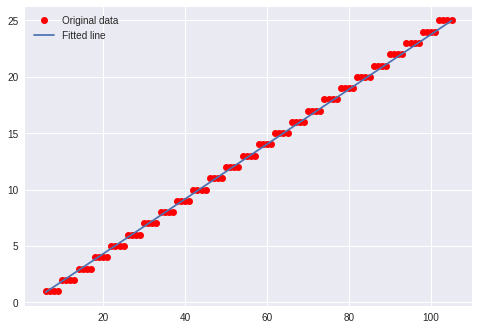

Epoch: 1800 cost= 0.057792705 W= 0.24335185 b= -0.5752208


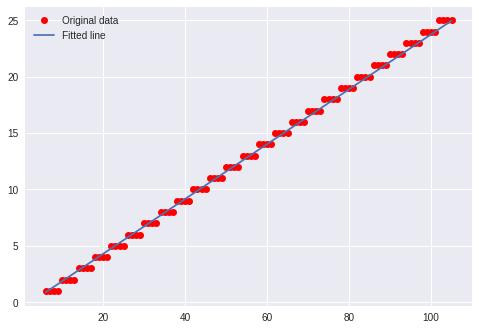

Epoch: 1900 cost= 0.057558078 W= 0.24350365 b= -0.59117335


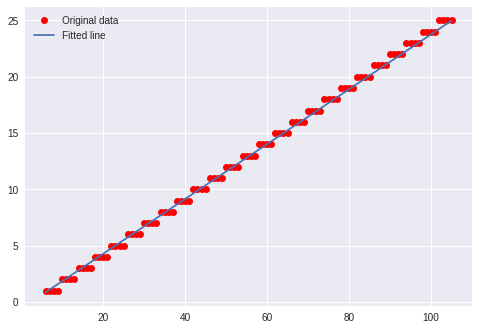

Epoch: 2000 cost= 0.057411935 W= 0.24364026 b= -0.6055324


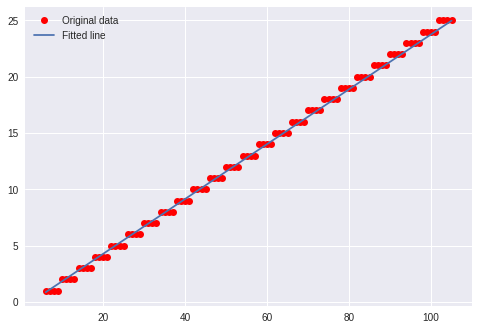

In [10]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            #Graphic display
            plt.plot(train_X, train_Y, 'ro', label='Original data')
            plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
            plt.legend()
            plt.show()
    save_path = saver.save(sess, "/tmp/model.ckpt")

In [0]:
def binarySearch(arr, l, r, x):
  if r >= l:
    mid = int(l + (r - l) / 2)
  if arr[mid] == x:
    return mid
  elif arr[mid] > x:
    return binarySearch(arr, l, mid - 1, x)
  else:
    return binarySearch(arr, mid + 1, r, x)
  return -1

In [69]:
key  = 11.0
pageNumber = tf.Variable(0.0)
var_test = tf.Variable(key)
page_size = 4
calculate = tf.add(tf.multiply(W, var_test), b)
update_operation = tf.assign(pageNumber, calculate)

with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  saver.restore(session, "/tmp/model.ckpt")
  print("W : %s" % W.eval())
  print("b : %s" % b.eval())
  session.run(update_operation)
  print(session.run(pageNumber))
  starting_point = (pageNumber - 1) * page_size
  ending_point = starting_point + (page_size - 1)
  left = int(starting_point.eval())
  right = int(ending_point.eval())
  print("the pozition of the key ",key," is ",binarySearch(train_X,left,right,key))
  

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
W : 0.24364026
b : -0.6055324
2.0745103
the pozition of the key  11.0  is  5
